In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size

In [4]:
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))

In [5]:
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb

In [6]:
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [7]:
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [13]:
from matplotlib import image as mpimg

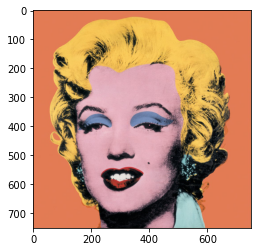

In [14]:
image = mpimg.imread("ORANGE.png")
plt.imshow(image)
plt.show()

In [9]:
df = get_data('ORANGE.png')

In [11]:
df.head()

,x,y,R,G,B
0,0,0,209,117,110
1,0,1,213,109,100
2,0,2,219,111,96
3,0,3,203,123,97
4,0,4,216,116,85


In [28]:
dfn

,R,G,B
0,0.231577,-0.323155,0.169766
1,0.287961,-0.478408,-0.024967
2,0.372537,-0.439594,-0.102861
3,0.147002,-0.206715,-0.083387
4,0.330249,-0.342561,-0.317067
...,...,...,...
562495,0.302057,-0.245528,-0.628640
562496,0.259769,-0.284341,-0.511800
562497,0.302057,-0.303748,-0.570220
562498,0.302057,-0.342561,-0.745480


In [16]:
def inspect(cluster):
    """This function is dependent on the code block above. View all the pixels in a specific cluster
    derived from k-means"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open('BLUE.jpeg')
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = (255,255,255)
    return im

In [15]:
dfn = df.iloc[:,2:].copy()
for i in range(3):
    dfn.iloc[:,i] = (dfn.iloc[:,i]-dfn.iloc[:,i].mean())/dfn.iloc[:,i].std()
kmeans = KMeans(n_clusters=9)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_
df

,x,y,R,G,B,Cluster
0,0,0,209,117,110,3
1,0,1,213,109,100,3
2,0,2,219,111,96,3
3,0,3,203,123,97,3
4,0,4,216,116,85,3
...,...,...,...,...,...,...
562495,749,745,214,121,69,3
562496,749,746,211,119,75,3
562497,749,747,214,118,72,3
562498,749,748,214,116,63,3


In [18]:
clusters = [inspect(i) for i in range(9)]

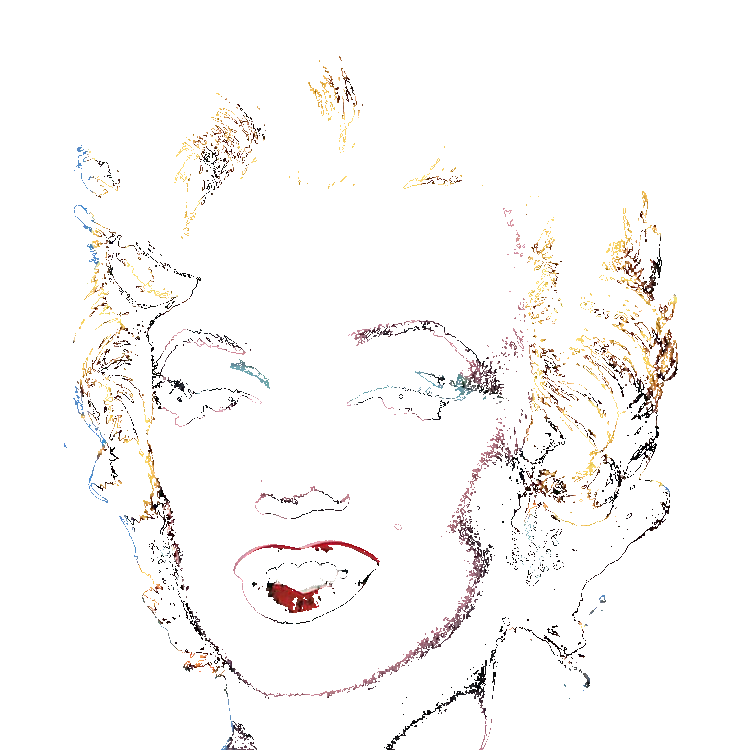

In [19]:
clusters[0]

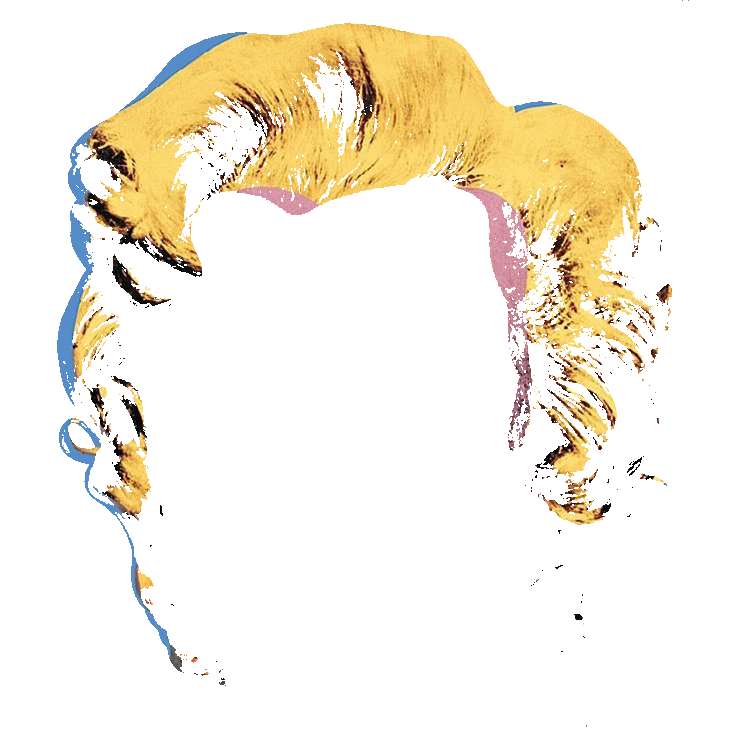

In [20]:
clusters[1]

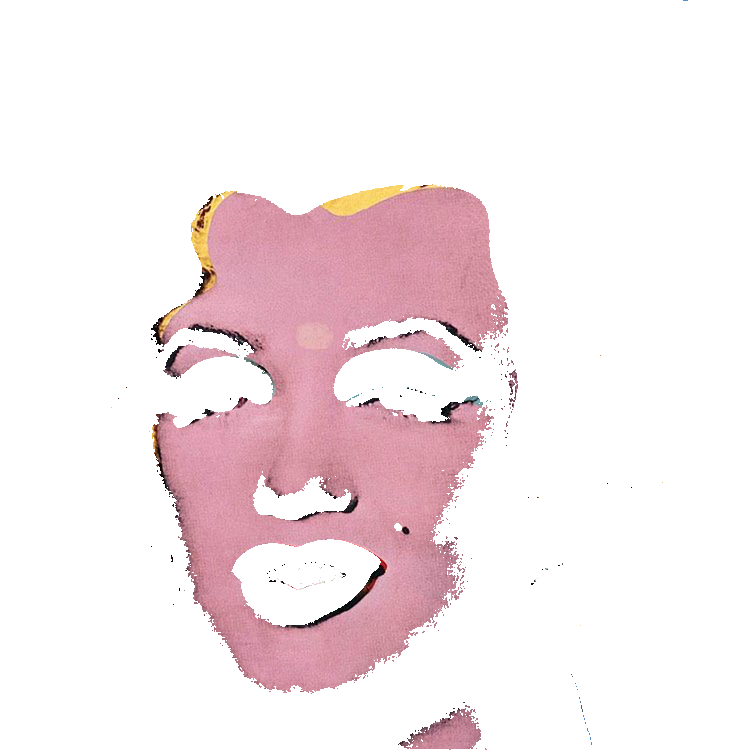

In [21]:
clusters[2]

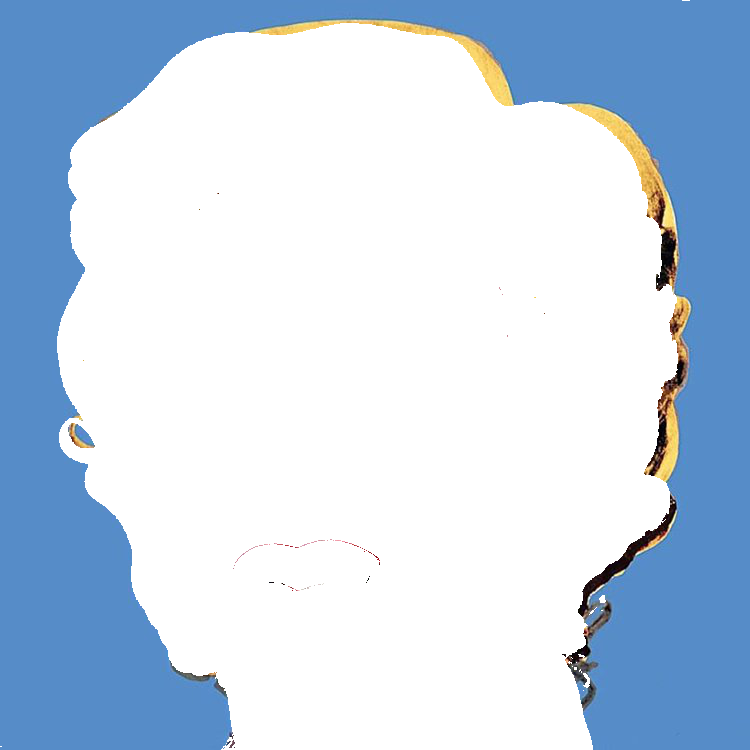

In [22]:
clusters[3]

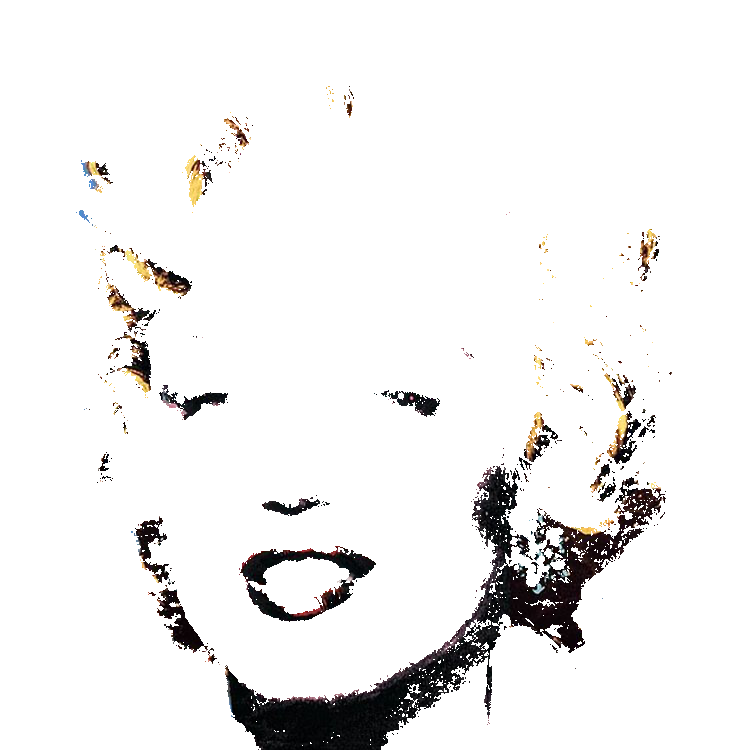

In [23]:
clusters[4]

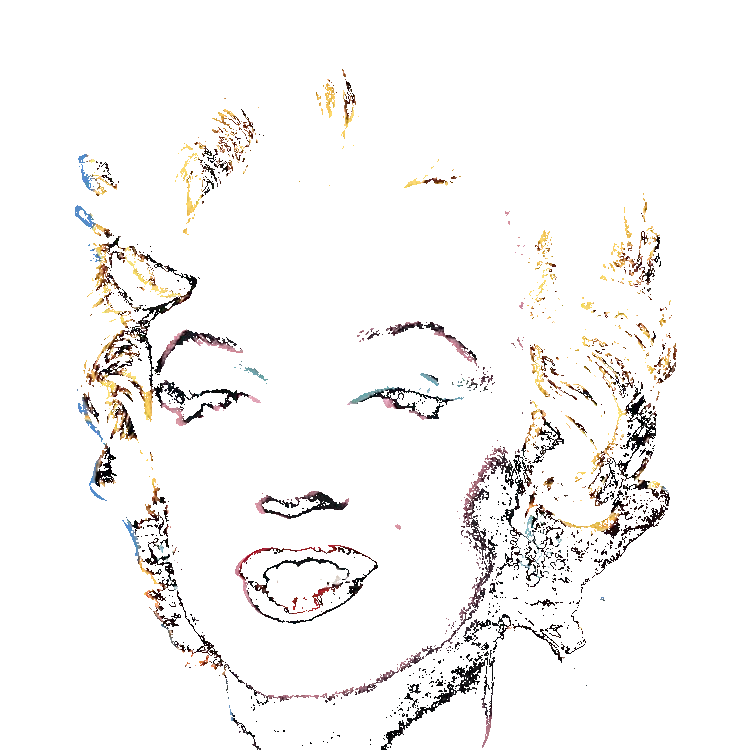

In [24]:
clusters[5]

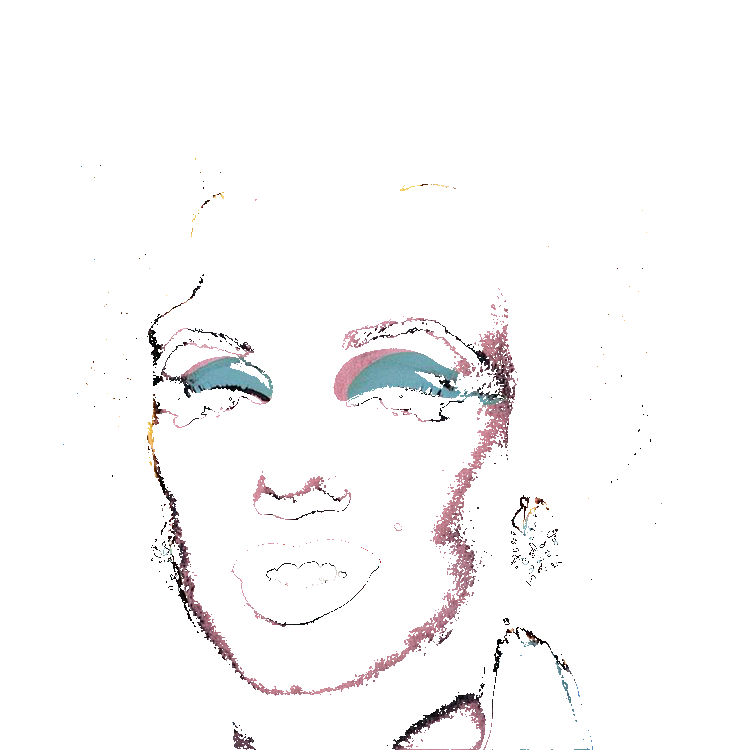

In [25]:
clusters[6]

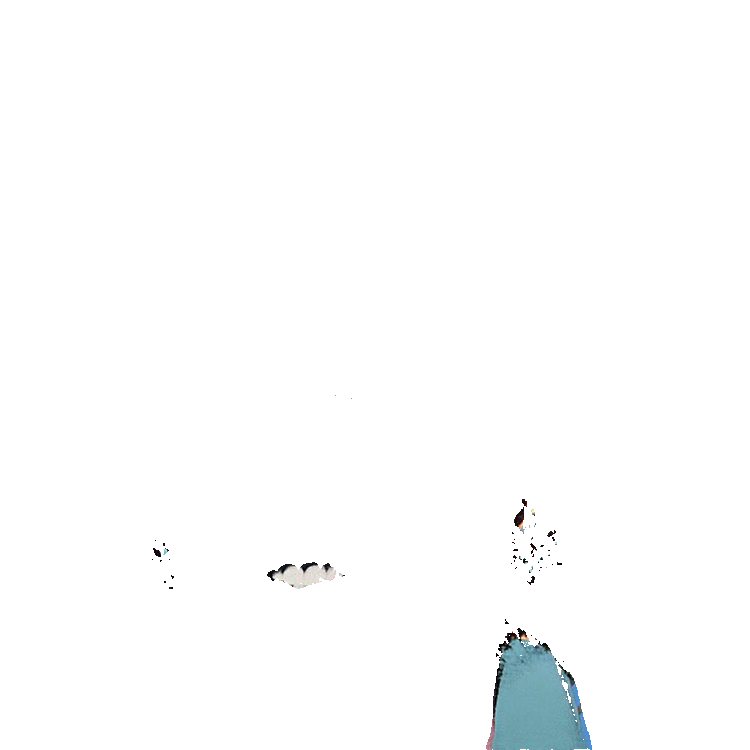

In [26]:
clusters[7]

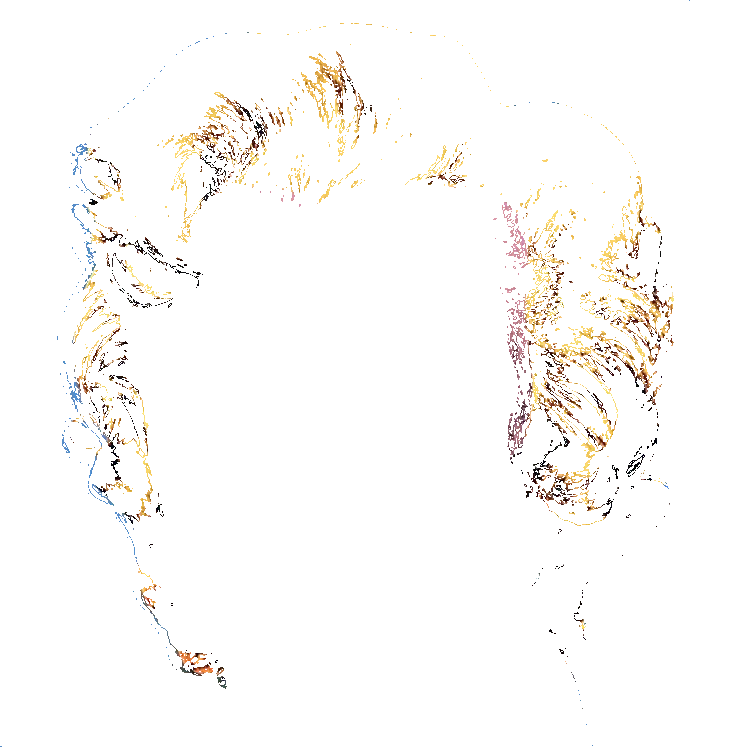

In [27]:
clusters[8]